### Bible Reading Progress Tracker - Data Exploration

Notebook ini digunakan untuk:
1. Load dan parse WhatsApp chat data
2. Analisis statistik dasar
3. Visualisasi pola komunikasi
4. Identifikasi pattern untuk progress reports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# suppress warnings in notebook
%config InlineBackend.print_warnings = False

# add src to path
sys.path.append('../')

from src.preprocessing.whatsapp_parser import WhatsAppParser
from src.extraction.progress_extractor import ProgressExtractor

# set style for plots
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

c:\Users\James\OneDrive\Desktop\bible_reading_recap_nlp\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 1. Load Data

In [2]:
# Load Whatsapp chat data
parser = WhatsAppParser()
normalizer = ProgressExtractor()

CHAT_FILE = Path('../data/raw/whatsapp_exports/_chat.txt')

df = parser.parse_chat_file(CHAT_FILE)
print(f'Total messages parsed: {len(df)}')
print(f'\nDataFrame shape: {df.shape}')
print(f'\nColumns: {df.columns.tolist()}')


c:\Users\James\OneDrive\Desktop\bible_reading_recap_nlp\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\James\.cache\huggingface\hub\models--sentence-transformers--paraphrase-multilingual-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'h

Total messages parsed: 19032

DataFrame shape: (19032, 5)

Columns: ['date', 'time', 'sender', 'message', 'timestamp']


In [3]:
# drop columns date and time, as it is redundant
df.drop(['date', 'time'], axis=1, inplace=True)

In [4]:
# Filter system-like messages
df_clean = parser.filter_system_messages(df)
print(f'Total messages after filtering system messages: {len(df_clean)}')

Total messages after filtering system messages: 18949


In [5]:
# Display sample messages
df_clean.head(15)

,sender,message,timestamp
0,"dr. Andreas C.N., Fp.B.",Siap terimakasih sudah diadd di grup 🙏🏻,2020-08-02 11:52:41
1,Lenny Pandjidharma,sami2 ...,2020-08-02 11:52:51
2,Lenny Pandjidharma,untuk peraturan group dan tata pelaksanaan ......,2020-08-02 11:53:17
3,Oma Lisa,Thanks Lenny.t Lisa ikut ya spytdk cpt pikun a...,2020-08-02 12:20:41
4,Mfitri,"Ok,makasih ci 🙏",2020-08-02 12:22:35
5,Sim Ay Tjan,Thanks Len.🙏🏼,2020-08-02 12:51:17
6,Tjunfebelyana,Thanks Len🙏,2020-08-02 13:01:32
7,Oma Lisa,Mulak kapan dan jam brp Lenny.Gbu txs,2020-08-02 14:22:31
8,Lenny Pandjidharma,"Dimulainya besok, Tante Lisa.",2020-08-02 14:26:58
9,Oma Lisa,Ok,2020-08-02 14:37:45


#### 2. Basic Statistics

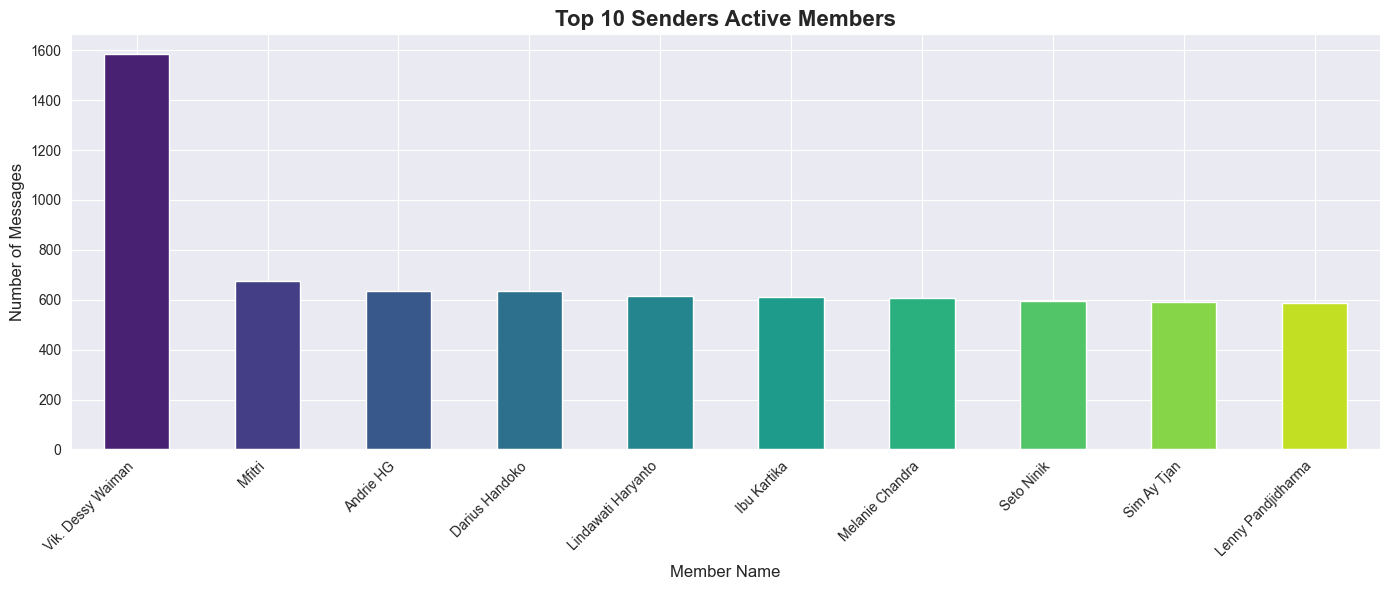

In [6]:
# Message counts by sender
sender_counts = df_clean['sender'].value_counts()

# Top 10 active members
sender_counts.head(10).plot(kind='bar', color=sns.color_palette('viridis', 10))
plt.title('Top 10 Senders Active Members', fontsize=16, fontweight='bold')
plt.xlabel('Member Name', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
# Messages per day
df_clean['date_only'] = df_clean['timestamp'].dt.date
messages_per_day = df_clean.groupby('date_only').size()

print(f'\nMessages per day statistics:')
print(f'Mean: {messages_per_day.mean():.2f}')
print(f'Median: {messages_per_day.median():.2f}')
print(f'Max: {messages_per_day.max()}')
print(f'Min: {messages_per_day.min()}')


Messages per day statistics:
Mean: 27.34
Median: 28.00
Max: 83
Min: 1


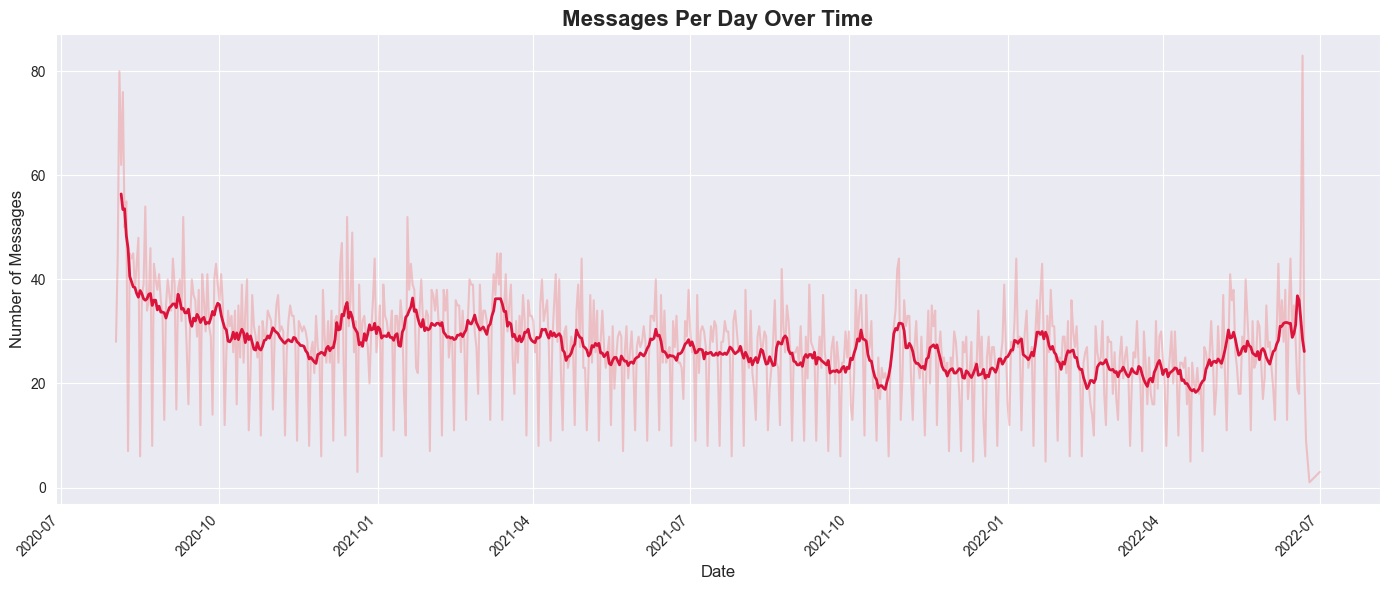

In [8]:
rolling = messages_per_day.rolling(window=7, center=True).mean()
plt.plot(messages_per_day.index, messages_per_day.values, color='lightcoral', alpha=0.4, label='Daily')
plt.plot(rolling.index, rolling.values, color='crimson', linewidth=2, label='7-Day Rolling Average')
plt.title('Messages Per Day Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

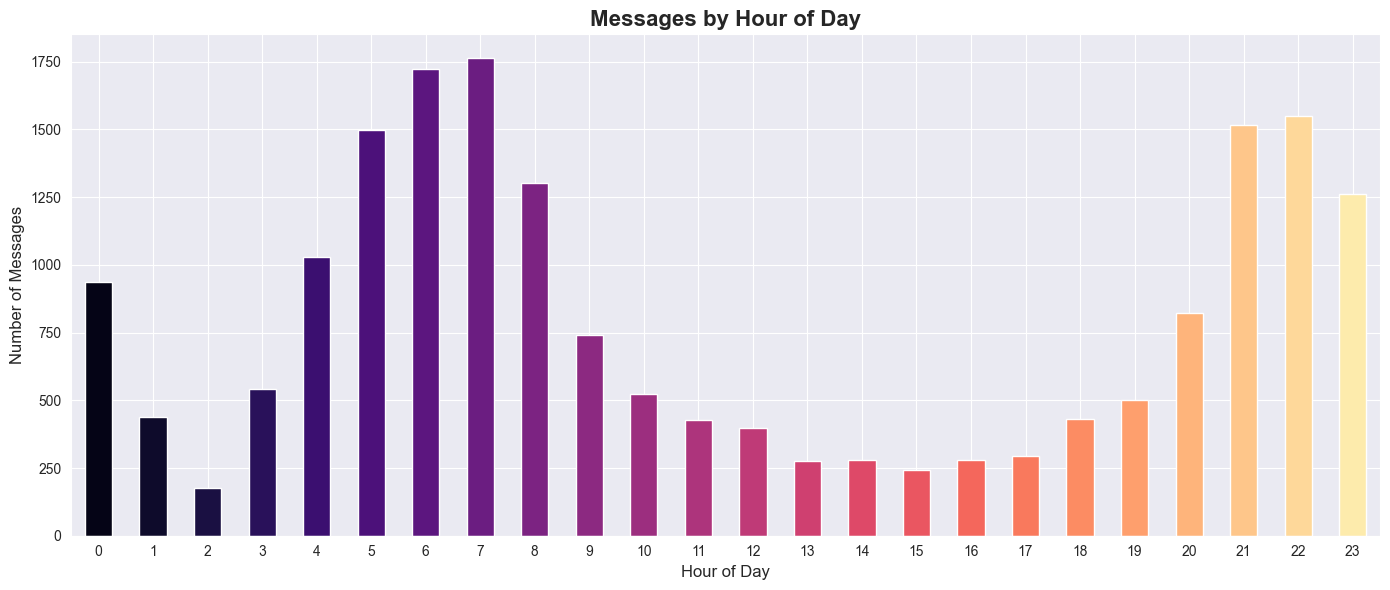

In [9]:
# Messages by hour of day
df_clean['hour'] = df_clean['timestamp'].dt.hour
messages_per_hour = df_clean['hour'].value_counts().sort_index()

messages_per_hour.plot(kind='bar', color=sns.color_palette('magma', 24))
plt.title('Messages by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
# Message Length Distribution (characters)
df_clean['message_length'] = df_clean['message'].str.len()

overall_mean = df_clean['message_length'].mean()
overall_median = df_clean['message_length'].median()

print(f'\nMessage Length Statistics')
print(f'  Mean: {overall_mean:.2f}')
print(f'  Median: {overall_median:.2f}')


Message Length Statistics
  Mean: 148.65
  Median: 15.00


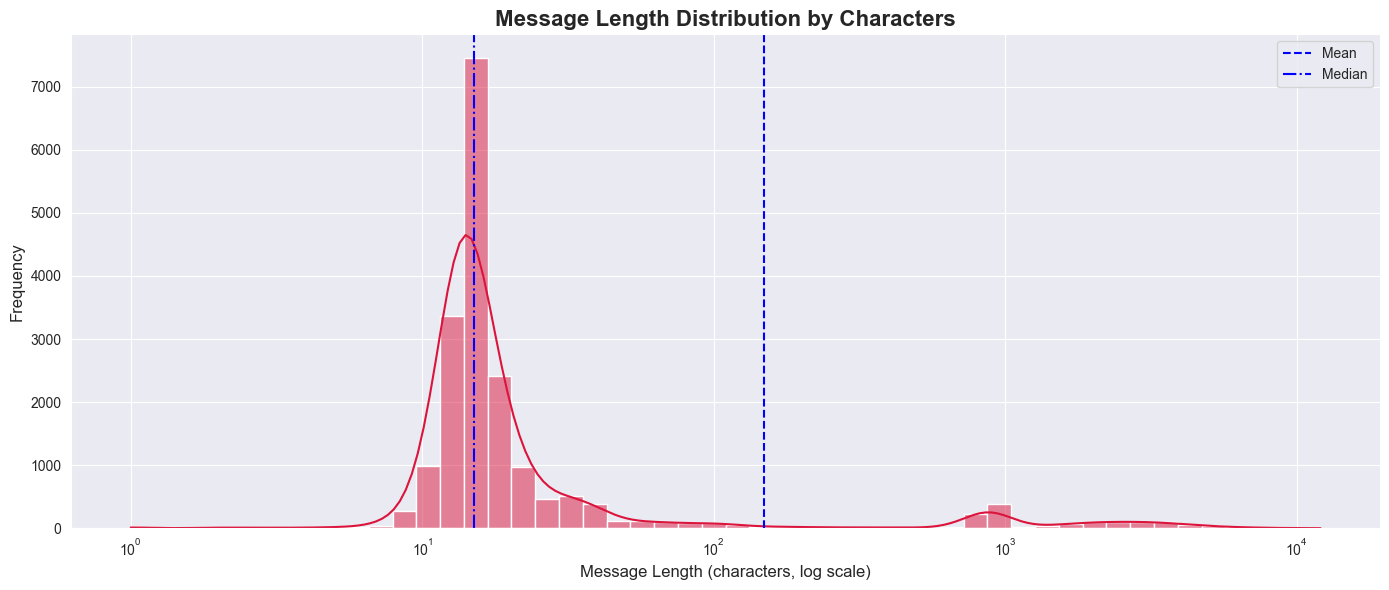

In [13]:
sns.histplot(df_clean['message_length'], bins=50, color='crimson', alpha=0.5, kde=True, log_scale=True)

plt.axvline(np.mean(df_clean['message_length']), color='blue', linestyle='--', label='Mean')
plt.axvline(np.median(df_clean['message_length']), color='blue', linestyle='-.', label='Median')

plt.title('Message Length Distribution by Characters', fontsize=16, fontweight='bold')
plt.xlabel('Message Length (characters, log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Number of lines per message
df_clean['num_lines'] = df_clean['message'].str.count('\n') + 1

overall_lines_mean = df_clean['num_lines'].mean()
overall_lines_median = df_clean['num_lines'].median()

print(f'\nNumber of Lines per Message:')
print(f'  Mean: {overall_lines_mean:.2f}')
print(f'  Median: {overall_lines_median:.2f}')


Number of Lines per Message:
  Mean: 3.92
  Median: 1.00


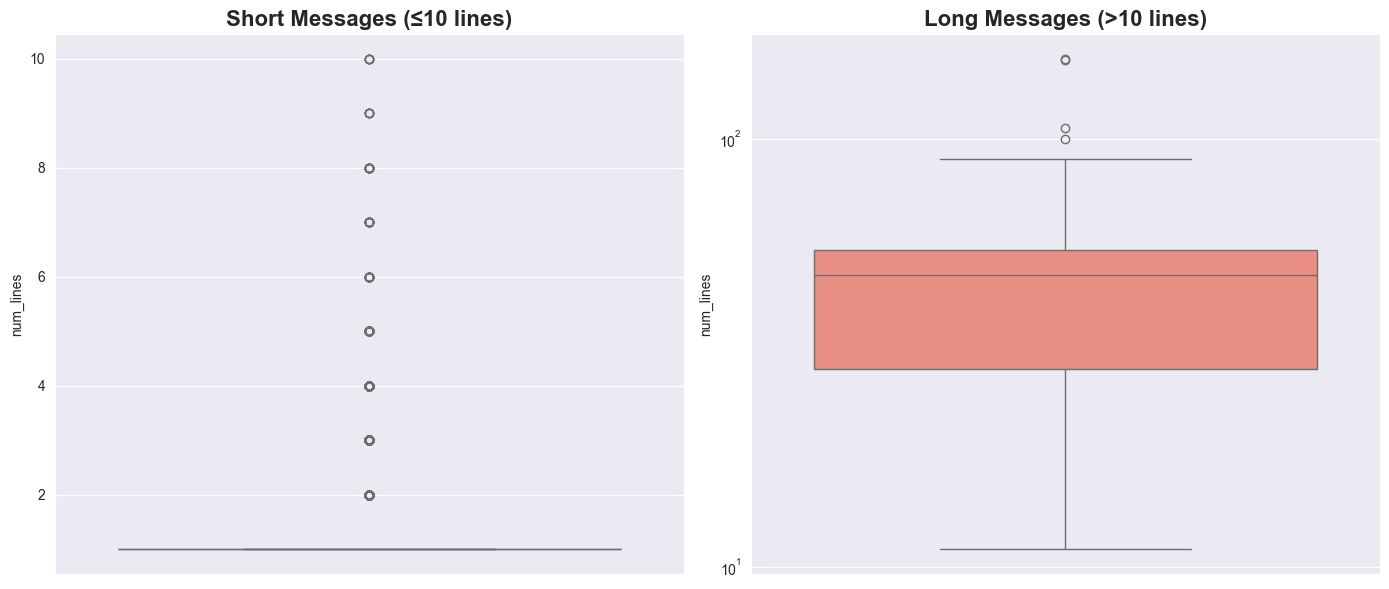

In [15]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean[df_clean['num_lines'] <= 10]['num_lines'], color='skyblue')
plt.title('Short Messages (≤10 lines)', fontsize=16, fontweight='bold')


plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean[df_clean['num_lines'] > 10]['num_lines'], color='salmon')
plt.title('Long Messages (>10 lines)', fontsize=16, fontweight='bold')

plt.yscale('log')

plt.tight_layout()
plt.show()

#### 3. Identify Progress Reports

In [16]:
progress_keywords = ['done', 'selesai', 'sudah', 'finish', '✓', '✅', '☑', '💥']

df_clean['has_progress_keyword'] = df_clean['message'].str.lower().apply(
    lambda x: any(kw in x for kw in progress_keywords)
)

print(f'Message with progress keywords')
print(f'Total: {df_clean["has_progress_keyword"].sum()} out of {len(df_clean)} messages')
print(f'Percentage: {df_clean["has_progress_keyword"].sum() / len(df_clean) * 100:.2f}%')

Message with progress keywords
Total: 16419 out of 18949 messages
Percentage: 86.65%


In [17]:
print('\nSample Messages with Progress Keywords:')
df_clean[df_clean['has_progress_keyword']][['sender', 'message']].head(10)


Sample Messages with Progress Keywords:


,sender,message
0,"dr. Andreas C.N., Fp.B.",Siap terimakasih sudah diadd di grup 🙏🏻
13,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
16,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
18,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
23,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
24,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
26,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
28,Melanie Chandra,Kej 1-2 done
29,Lindawati Haryanto,Kej 1-2 done
30,Sherly Cahyadi,Kej 1-2 done


In [19]:
# Extract bible references
def extract_bible_ref(message):
    refs = normalizer.extract(message)
    if refs:
        return ', '.join(ref['normalized_text'] for ref in refs)
    return None

df_clean['bible_reference'] = df_clean['message'].apply(extract_bible_ref)
df_clean['has_bible_ref'] = df_clean['bible_reference'].notna()

print(f'Messages with Bible References')
print(f'Total: {df_clean['has_bible_ref'].sum()}')
print(f'Percentage: {df_clean["has_bible_ref"].sum() / len(df_clean) * 100:.2f}%')

print(normalizer.get_stats())

Messages with Bible References
Total: 17071
Percentage: 90.09%
{'rule_based': 15656, 'semantic': 1415, 'failed': 0}


In [20]:
# Sample messages with bible references
print('\nSample Messages with Bible References:')
df_clean[df_clean['has_bible_ref']][['sender', 'message', 'bible_reference']].head(10)


Sample Messages with Bible References:


,sender,message,bible_reference
13,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...,"Ezra 6, Kisah Para Rasul 15, 1 Korintus 9, 2 K..."
16,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be...",Kejadian 1-2
18,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G...","Kejadian 1-2, Daniel 2, Ibrani 11, Kejadian 1,..."
20,Vik. Dessy Waiman,1 Raja dan 2 Raja,1 Raja-raja 2
21,Ibu Kartika,"meski sama-sama 2 pasal, tapi di cycle 2 ini r...",Pengkhotbah 2
23,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be...",Kejadian 1-2
24,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...,"Ezra 6, Kisah Para Rasul 15, 1 Korintus 9, 2 K..."
26,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G...","Kejadian 1-2, Daniel 2, Ibrani 11, Kejadian 1,..."
28,Melanie Chandra,Kej 1-2 done,Kejadian 1-2
29,Lindawati Haryanto,Kej 1-2 done,Kejadian 1-2


In [19]:
# Identify likely progress reports 
df_clean['likely_progress'] = (
    df_clean['has_progress_keyword'] & df_clean['has_bible_ref']
)

print(f'Likely Progress Reports')
print(f'Total: {df_clean['likely_progress'].sum()}')
print(f'Percentage: {df_clean["likely_progress"].sum() / len(df_clean) * 100:.2f}%')

Likely Progress Reports
Total: 14644
Percentage: 77.28%


In [20]:
# Sample likely progress reports
print('\nSample Likely Progress Reports:')
df_clean[df_clean['likely_progress']][['sender', 'message']].head(15)


Sample Likely Progress Reports:


,sender,message
13,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
16,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat ..."
18,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
23,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat ..."
24,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
26,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
28,Melanie Chandra,Kej 1-2 done
29,Lindawati Haryanto,Kej 1-2 done
30,Sherly Cahyadi,Kej 1-2 done
31,Seto Ninik,Kej 1-2 done


#### 4. Pattern Analysis

In [21]:
# Message length analysis 
df_clean['message_length'] = df_clean['message'].str.len()

# Compare length between progress and non-progress messages
progress_lengths = df_clean[df_clean['likely_progress']]['message_length']
non_progress_lengths = df_clean[~df_clean['likely_progress']]['message_length']

print(f'\nMessage Length Statistics')
print(f'\nProgress reports:')
print(f'  Mean: {progress_lengths.mean():.2f}')
print(f'  Median: {progress_lengths.median():.2f}')

print(f'\nNon-Progress reports:')
print(f'  Mean: {non_progress_lengths.mean():.2f}')
print(f'  Median: {non_progress_lengths.median():.2f}')


Message Length Statistics

Progress reports:
  Mean: 62.72
  Median: 14.00

Non-Progress reports:
  Mean: 441.94
  Median: 18.00


C:\Users\James\AppData\Local\Temp\ipykernel_28112\1559345934.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='type', y='message_length', palette={'Progress': 'skyblue', 'Non-Progress': 'salmon'}, showfliers=False)


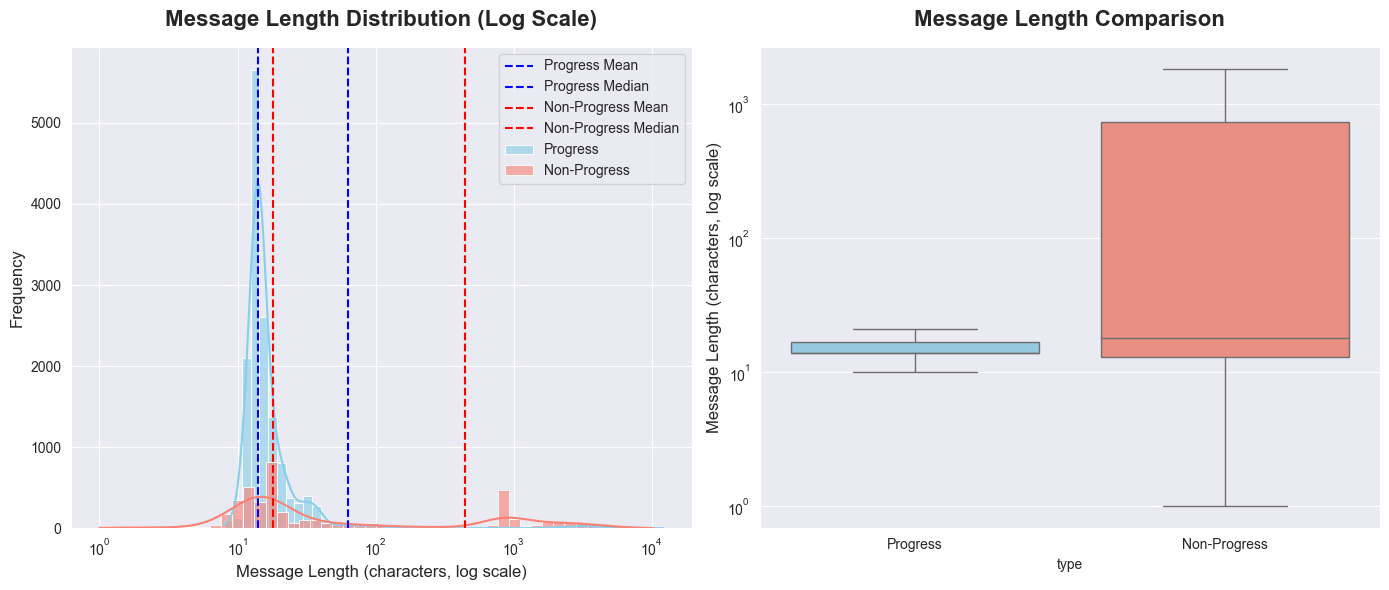

In [22]:

plt.subplot(1, 2, 1)
sns.histplot(progress_lengths, bins=50, color='skyblue', alpha=0.6, label='Progress', kde=True, log_scale=True)
sns.histplot(non_progress_lengths, bins=50, color='salmon',alpha=0.6, label='Non-Progress', kde=True, log_scale=True)

plt.axvline(np.mean(progress_lengths), color='blue', linestyle='--', label='Progress Mean')
plt.axvline(np.median(progress_lengths), color='blue', linestyle='--', label='Progress Median')

plt.axvline(np.mean(non_progress_lengths), color='red', linestyle='--', label='Non-Progress Mean')
plt.axvline(np.median(non_progress_lengths), color='red', linestyle='--', label='Non-Progress Median')

plt.title('Message Length Distribution (Log Scale)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Message Length (characters, log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

df_box = pd.DataFrame({
    'message_length': np.concatenate([progress_lengths, non_progress_lengths]),
    'type': ['Progress'] * len(progress_lengths) + ['Non-Progress'] * len(non_progress_lengths)
})

plt.subplot(1, 2, 2)
sns.boxplot(data=df_box, x='type', y='message_length', palette={'Progress': 'skyblue', 'Non-Progress': 'salmon'}, showfliers=False)
plt.yscale('log')
plt.xticks([0, 1], ['Progress', 'Non-Progress'])
plt.title('Message Length Comparison', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Message Length (characters, log scale)', fontsize=12)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

In [23]:
# Progress by Members
progress_by_member = df_clean[df_clean['likely_progress']].groupby('sender').size().sort_values(ascending=False)

print(f'Progress Reports by Members (Top 20)')
progress_by_member.head(20)

Progress Reports by Members (Top 20)


sender
Andrie HG                   578
Lindawati Haryanto          573
Seto Ninik                  552
Darius Handoko              546
Ci Ina Paperku              545
susianawati309              520
Nurcahaya Sihombing         518
Lenny Pandjidharma          511
🎍                           500
Ibu Kartika                 499
Ivan teguh                  497
Mfitri                      489
Dewi Pratiwi                485
Melanie Chandra             483
Sim Ay Tjan                 470
Ruri Handoko                458
Kristin WIjaya Nusantara    419
Endang Surati               404
Agnes                       383
Tjunfebelyana               355
dtype: int64

C:\Users\James\AppData\Local\Temp\ipykernel_28112\1292357395.py:18: UserWarning: Glyph 127885 (\N{PINE DECORATION}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\James\OneDrive\Desktop\bible_reading_recap_nlp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127885 (\N{PINE DECORATION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


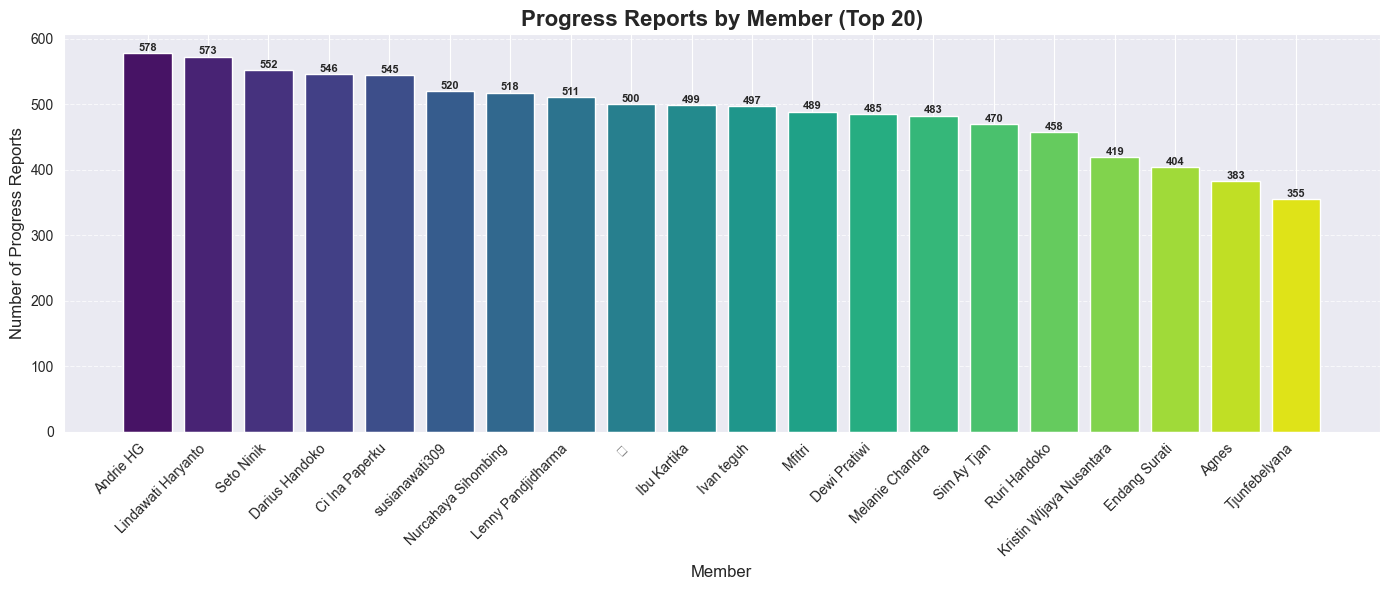

In [24]:
bars = plt.bar(progress_by_member.head(20).index,
               progress_by_member.head(20).values,
               color=sns.color_palette('viridis', 20))

plt.title('Progress Reports by Member (Top 20)', fontsize=16, fontweight='bold')
plt.xlabel('Member', fontsize=12)
plt.ylabel('Number of Progress Reports', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()